# Table of Contents
 <p>

In [421]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [422]:
%autoreload 2

import numpy as np
import dask.array as da
import matplotlib.pyplot as plt
import datetime as dt
import sys,os,glob

## Add own library to path
workdir = os.getcwd()
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])
## Load own libraries
from environmentAndDirectories import *
from importingData import *
from scalingApproximations import *
from slicingAndSubsetting import *

Own modules available: ['CAMsettings', 'daskOptions', 'environmentAndDirectories', 'importingData', 'physicalConstants', 'scalingApproximations', 'slicingAndSubsetting', 'statisticalDistributions', 'thermoConstants', 'thermoFunctions']


In [423]:
compset = 'FAMIPC5'
experiment = 'piControl'
subset = 'tropics'
time_stride = 'day'

historyFilesSettings = getCAMHistoryFilesSettings()

inputdir, inputdir_processed_day, inputdir_processed_1hr, inputdir_results, inputdir_fx = \
    getInputDirectories(compset,experiment)

q_varid = 'Q'
spechum = getValues(q_varid,compset,subset,experiment,time_stride)
omega_varid = 'OMEGA'
omega = getValues(omega_varid,compset,subset,experiment,time_stride)

Q found in history files
Importing Q from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc
OMEGA found in history files
Importing OMEGA from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc


In [424]:
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)

In [425]:
ps_varid = 'PS'
ps = getValues(ps_varid,compset,subset,experiment,time_stride)
pres = computeP(ps)

PS found in history files
Importing PS from 25 files
  from
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-01-00000.nc
  to
  /Users/bfildier/Data/simulations/bf_FAMIPC5_piControl/bf_FAMIPC5_piControl.cam.h0.1850-05-02-00000.nc


In [428]:
p_500 = 500; levdim=1
p_925 = 925
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)

[   4    4    0    0    0    0    4    0    0    0    0    0    0    3    2
    3    0    0    4    0    0    4    0    0    0    0    4    0    0    8
    4    4    4    0    4    0    3    8    1    8    4   20    7    1    7
    5    0    0    4   12    5    3   14    9    5    0    5   15   12   22
   28   27   15   23   34   51   50   89   87   48   53   53   74   73   62
   80   87  114  107  113  152  132  161  211  273  283  315  310  280  289
  288  304  347  489  699 5416 4212 1862  781  134]


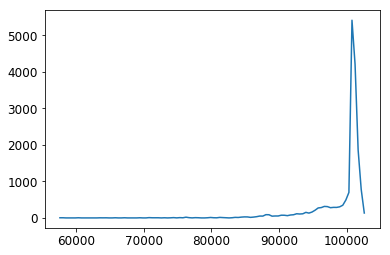

In [445]:
H, bins = np.histogram(ps,bins=100)
print(H)
centers = np.convolve(bins,(0.5,0.5),mode='valid')
plt.plot(centers,H)

In [452]:
q_925 = isobaricSurface(pres.compute(),pres.compute(),p_ref=p_925,levdim=levdim) 

0
552960 17067
17067


ValueError: cannot reshape array of size 17067 into shape (4,1,32,144)